In [2]:
# import necessary libraries
import os
import shutil
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import psutil
import sys
import pyemu
import swatp_pst
assert "dependencies" in pyemu.__file__
assert "dependencies" in swatp_pst.__file__

In [3]:
# import analyzer from swatp_pst
from swatp_pst import analyzer

## 01. Specify a path to the model folder

In [4]:
# m_d = '/Users/seonggyu.park/Documents/projects/tools/swatp_pst_wf/models/albufera/2nd/alb_rw_ies'
m_d = "D:\\Projects\\Watersheds\\Albufera\\2nd\\alb_rw_ies"

## 02. Let's see how we did:

In [5]:
pst_file = "alb_rw_ies.pst"
pst = pyemu.Pst(os.path.join(m_d, pst_file))

In [6]:
# load prior simulation
pr_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"alb_rw_ies.0.obs.csv")
    )
# load posterior simulation, let's use 8th iteration results from posterior ensambles
pt_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,
    filename=os.path.join(m_d,"alb_rw_ies.{0}.obs.csv".format(8))
    )

### 02.01 phi progress

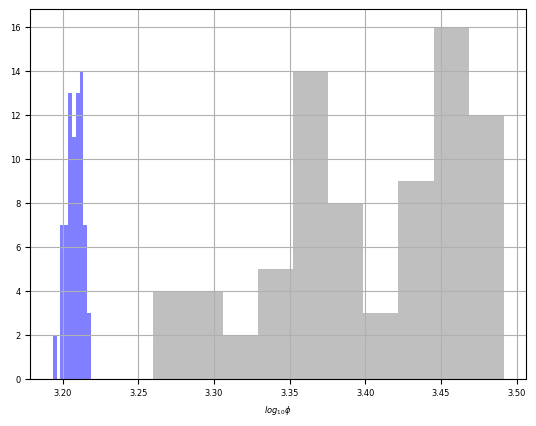

In [7]:
# plot progress
fig,ax = plt.subplots(1,1)
pr_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="0.5",ec="none",alpha=0.5,density=False)
pt_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="b",ec="none",alpha=0.5,density=False)
_ = ax.set_xlabel("$log_{10}\\phi$")

In [8]:
# calculate objective function values for ns, pbias, rms
analyzer.create_rels_objs(m_d, pst_file, 8)
# then select one of best candidates

### 02.02 Predictive uncertainty

In [9]:
df =  analyzer.get_pr_pt_df(pst, pr_oe, pt_oe, bestrel_idx=34)

return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame


['cha049' 'obd_irr_paddy']
(np.float64(0.9346069752725319), -2.738993487215565, np.float64(0.9461039337861581), np.float64(0.061718581765344054), np.float64(0.0038091833351254593), np.float64(0.9726787413047322))


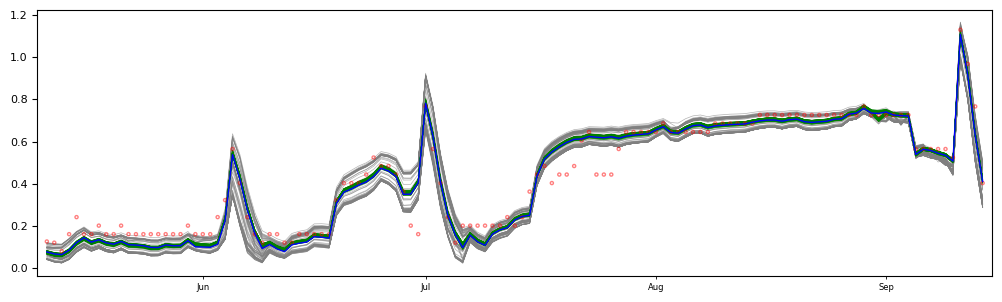

In [10]:
analyzer.plot_tseries_ensembles(pst, pr_oe, pt_oe, "cha049", bstcd=34)
# get obj values ns, pbias, rsq, rmse, mse, pcc for each obd group
print(analyzer.get_rels_objs_new(df, "cha049"))

d:\Projects\Tools\swatp_pst_wf\notebooks\02_workflows


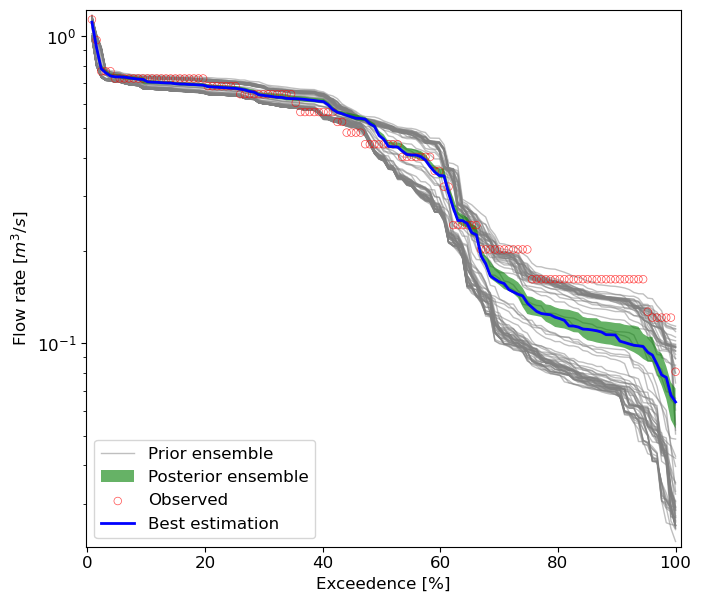

In [11]:
analyzer.single_plot_fdc_added(
                            pst, df, "cha049", pr_oe=pr_oe, bstc=True,
                            width=7, height=6
                               )

['cha049' 'obd_irr_paddy']
(np.float64(0.7255397647538636), 0.454083284117253, np.float64(0.7258244625154778), np.float64(107.86698814966971), np.float64(11635.287132480986), np.float64(0.8519533217937928))


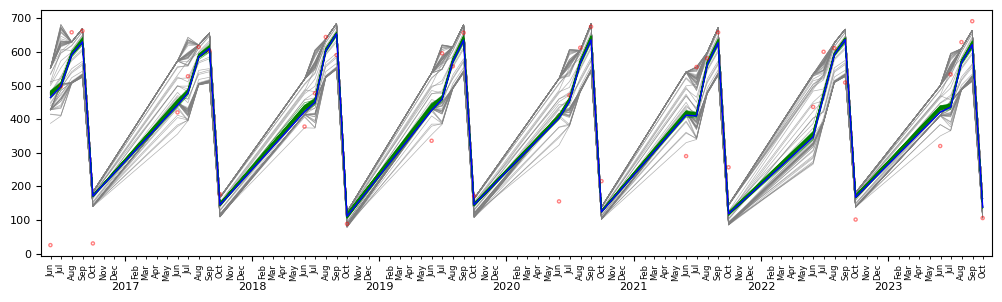

In [12]:
analyzer.plot_tseries_ensembles(pst, pr_oe, pt_oe, "obd_irr_paddy", bstcd=34)
print(analyzer.get_rels_objs_new(df, "obd_irr_paddy"))

### 02.03 Parameter uncertainty

In [15]:
prior_df = pyemu.ParameterEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"alb_rw_ies.{0}.par.csv".format(0)))
post_df = pyemu.ParameterEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"alb_rw_ies.{0}.par.csv".format(8)))
df_pars = pd.read_csv(os.path.join(m_d, "alb_rw_ies.par_data.csv"))
sel_pars = df_pars.loc[df_pars["partrans"]=='log']
sel_pars

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
0,alpha,log,factor,100,1,199,pargp,1,-100,1
1,awc,log,factor,100,1,199,pargp,1,-100,1
2,canmx,log,factor,100,1,199,pargp,1,-100,1
3,cn2,log,factor,100,1,199,pargp,1,-100,1
4,cn3_swf,log,factor,100,1,199,pargp,1,-100,1
5,epco,log,factor,100,1,199,pargp,1,-100,1
6,esco,log,factor,100,1,199,pargp,1,-100,1
7,lat_len,log,factor,100,1,199,pargp,1,-100,1
8,latq_co,log,factor,100,1,199,pargp,1,-100,1
9,perco,log,factor,100,1,199,pargp,1,-100,1


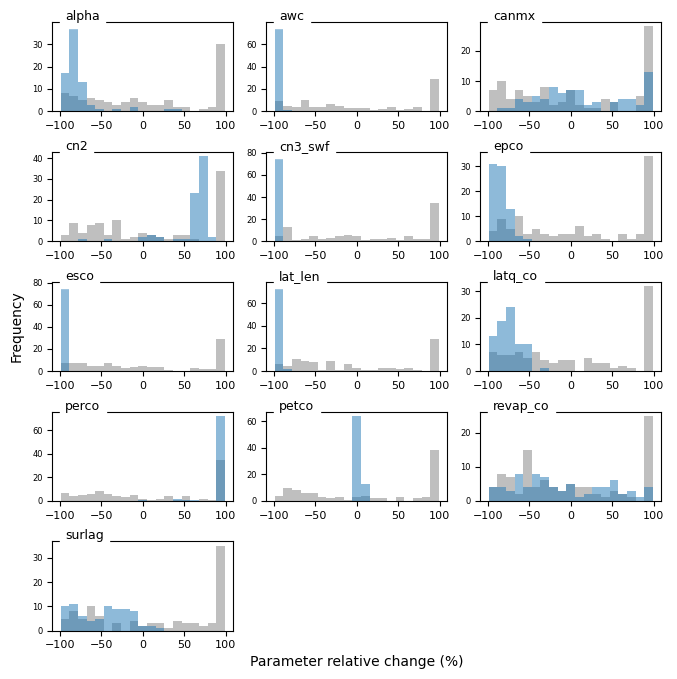

d:\Projects\Tools\swatp_pst_wf\notebooks\02_workflows


In [16]:
analyzer.plot_prior_posterior_par_hist(m_d, pst, prior_df, post_df, sel_pars, height=7)

### 02.04 Sensitivity Analysis

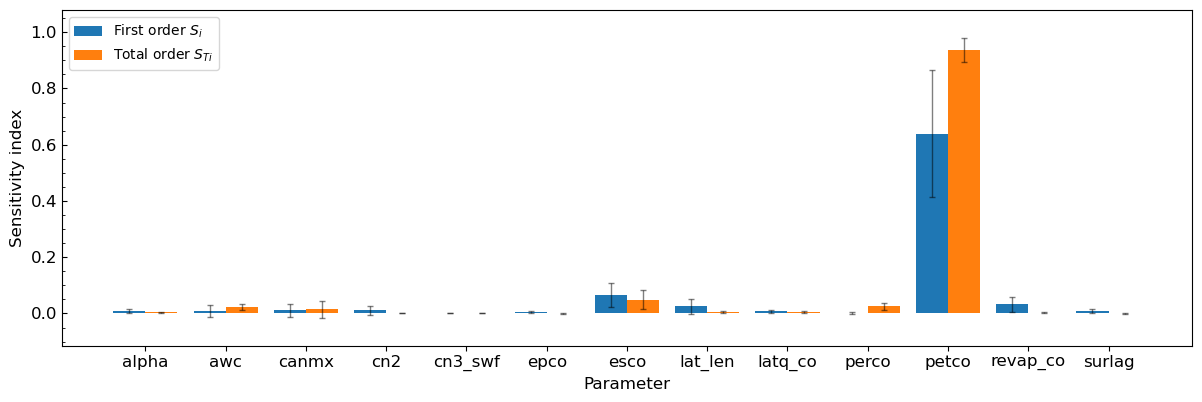

In [20]:
wd = "D:\\Projects\\Watersheds\\Albufera\\2nd\\alb_rw_sobol"
pst_file = "alb_rw_sobol.pst"
analyzer.plot_sen_sobol(wd, pst_file)